In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.svm import SVR
from itertools import product
from minesweeper import Minesweeper

In [3]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X_train, X_test, y_train, y_test = train_test_split(*make_classification(n_samples=10000,n_features=200))

In [4]:
parameter_space = {
    'n_estimators':{'range':[1,10], 'func':int},
                  'max_depth':{'range':[4,20], 'func': lambda λ: 4*int(λ//4)},
#                   'min_samples_split':{'range':[2,100],'func':int},
                  'max_features':{'range':[0,1], 'func': lambda λ:'sqrt' if λ>.5 else 'log2'}
#                   'min_samples_leaf':[2,200],
                  }
  

In [5]:
parameter_space

{'n_estimators': {'range': [1, 10], 'func': int},
 'max_depth': {'range': [4, 20], 'func': <function __main__.<lambda>(λ)>},
 'max_features': {'range': [0, 1], 'func': <function __main__.<lambda>(λ)>}}

In [6]:
ms = Minesweeper(parameter_space, verbose=True)

In [7]:
while True:
    
    parameters = ms.get_parameters()
    if parameters == None: break
    print(parameters)
    
    rfc = RFC(**parameters, n_jobs=-1).fit(X_train,y_train)
    score = f1_score(y_test, rfc.predict(X_test))
    print(score)
    ms.update_values(parameters, score)
ms.df

{'n_estimators': 8, 'max_depth': 4, 'max_features': 'log2'}
0.9249297470895222
{'n_estimators': 2, 'max_depth': 16, 'max_features': 'sqrt'}
0.7861224489795919
{'n_estimators': 2, 'max_depth': 4, 'max_features': 'log2'}
0.7884902840059791
{'n_estimators': 8, 'max_depth': 16, 'max_features': 'log2'}
0.875710804224208
{'n_estimators': 2, 'max_depth': 4, 'max_features': 'sqrt'}
0.6580375782881002
{'n_estimators': 2, 'max_depth': 16, 'max_features': 'log2'}
0.7177990829512296
increasing b to 4
Already done
Already done
{'n_estimators': 8, 'max_depth': 12, 'max_features': 'log2'}
0.9056298096395302
{'n_estimators': 6, 'max_depth': 8, 'max_features': 'log2'}
0.9011254019292605
{'n_estimators': 4, 'max_depth': 12, 'max_features': 'sqrt'}
0.9063761097659403
{'n_estimators': 6, 'max_depth': 8, 'max_features': 'sqrt'}
0.9111111111111111
increasing b to 5
{'n_estimators': 9, 'max_depth': 16, 'max_features': 'sqrt'}
0.9240710823909533
{'n_estimators': 5, 'max_depth': 4, 'max_features': 'log2'}
0.90

Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
increasing b to 13
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Alread

,n_estimators,max_depth,max_features,score
0,0.833333,0.166667,0.500000,0.924930
1,0.166667,0.833333,0.833333,0.786122
2,0.166667,0.166667,0.166667,0.788490
3,0.833333,0.833333,0.500000,0.875711
4,0.166667,0.166667,0.833333,0.658038
...,...,...,...,...
694,0.843750,0.281250,0.718750,0.931187
695,0.031250,0.593750,0.156250,0.585502
696,0.468750,0.656250,0.343750,0.886838
697,0.156250,0.281250,0.406250,0.606323


In [8]:
ms.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_estimators  699 non-null    float64
 1   max_depth     699 non-null    float64
 2   max_features  699 non-null    float64
 3   score         699 non-null    float64
dtypes: float64(4)
memory usage: 22.0 KB


In [9]:
ms.history.sort_values('score', ascending=False)

,n_estimators,max_depth,max_features,score
56,7,8,sqrt,0.932086
67,8,8,sqrt,0.931187
16,7,12,sqrt,0.930645
61,5,12,sqrt,0.927677
71,5,8,sqrt,0.927571
...,...,...,...,...
4,2,4,sqrt,0.658038
54,3,8,log2,0.652875
51,2,8,log2,0.606323
13,1,12,log2,0.585502


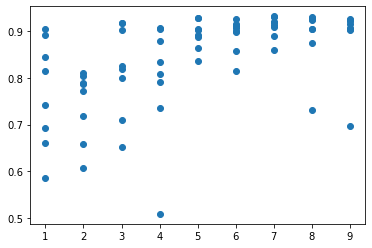

In [10]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

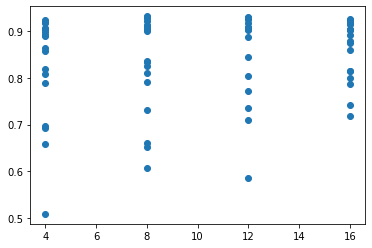

In [11]:
plt.scatter(ms.history.iloc[:,1], ms.history.score)

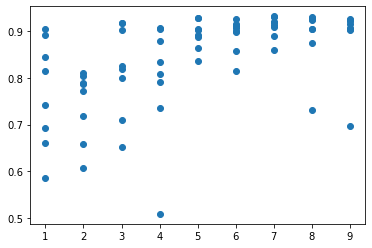

In [12]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

In [13]:
ms.df

,n_estimators,max_depth,max_features,score
0,0.833333,0.166667,0.500000,0.924930
1,0.166667,0.833333,0.833333,0.786122
2,0.166667,0.166667,0.166667,0.788490
3,0.833333,0.833333,0.500000,0.875711
4,0.166667,0.166667,0.833333,0.658038
...,...,...,...,...
694,0.843750,0.281250,0.718750,0.931187
695,0.031250,0.593750,0.156250,0.585502
696,0.468750,0.656250,0.343750,0.886838
697,0.156250,0.281250,0.406250,0.606323


In [14]:
ms.previous_values

{"{'n_estimators': 8, 'max_depth': 4, 'max_features': 'log2'}": {'values': [{'n_estimators': 0.8333333333333333,
    'max_depth': 0.16666666666666666,
    'max_features': 0.5},
   {'n_estimators': 0.875, 'max_depth': 0.125, 'max_features': 0.125},
   {'n_estimators': 0.8125, 'max_depth': 0.0625, 'max_features': 0.0625},
   {'n_estimators': 0.7916666666666666,
    'max_depth': 0.125,
    'max_features': 0.4583333333333333},
   {'n_estimators': 0.7916666666666666,
    'max_depth': 0.125,
    'max_features': 0.375},
   {'n_estimators': 0.7916666666666666,
    'max_depth': 0.041666666666666664,
    'max_features': 0.4583333333333333},
   {'n_estimators': 0.875,
    'max_depth': 0.125,
    'max_features': 0.29166666666666663},
   {'n_estimators': 0.8076923076923077,
    'max_depth': 0.19230769230769232,
    'max_features': 0.038461538461538464},
   {'n_estimators': 0.8076923076923077,
    'max_depth': 0.038461538461538464,
    'max_features': 0.19230769230769232},
   {'n_estimators': 0.8214